### Bài tập 1. Cho hàm số một biến $f(x) = x^2 + 4x + 3$

1. Chúng ta sẽ thấy ngay hàm số đạt cực tiểu tại điểm $x^* = −2$. Bạn hãy giải thích tại sao bằng toán học. (*Gợi ý: Các bạn có thể dùng kiến thức môn Giải Tích đã học tại chương trình THPT*).
2. Viết chương trình máy tính sử dụng thuật toán Gradient Descent tìm giá trị gần đúng của $x^*$.
3. Thay đổi nghiệm (điểm cực tiểu) ban đầu khi thực hiện thuật toán Gradient Descent và nhận xét.
4. Bạn có thể chạy thuật toán Gradient Descent bằng tay cho $2$ vòng lặp được không?

# Đạo hàm của hàm số là f'(x) = 2x + 4
# Giải phương trình 2x + 4 = 0 ta được nghiệm = -2
# vẽ bảng biến thiên: 
![Bảng biến thiên](https://github.com/dxv2k/Machine_Learning_CS114/blob/LAB04/Capture.PNG?raw=1)


In [0]:
import numpy as np 
import matplotlib.pyplot as plt 
from sympy import *

In [21]:
constan = np.poly1d([1, 4, 3])
gradients = constan.deriv()
print(gradients)
gradients(5)
x = np.linspace(-10, 10 ,100)

 
2 x + 4


In [0]:
y = constan(x)

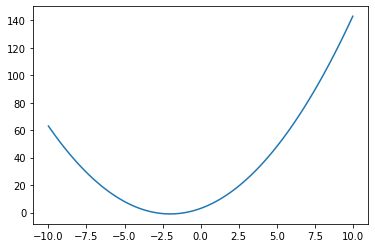

In [23]:
ax = plt.subplot()
ax.plot(x,y)

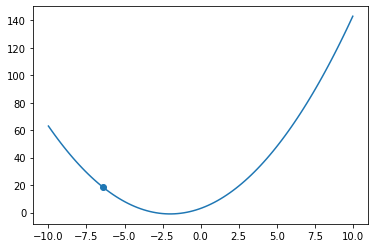

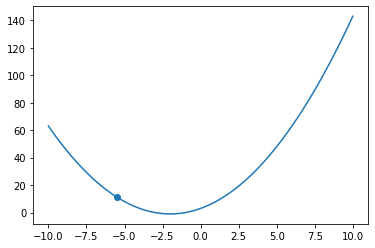

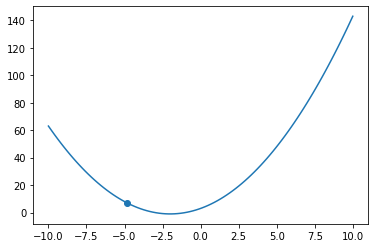

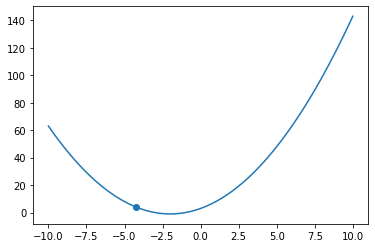

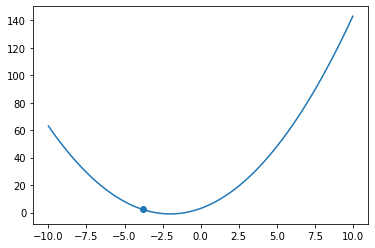

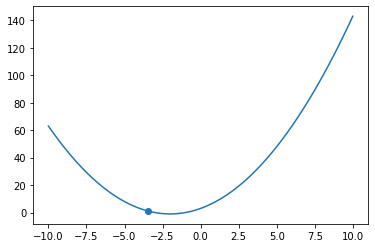

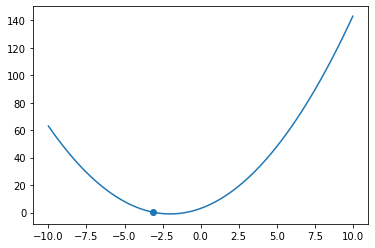

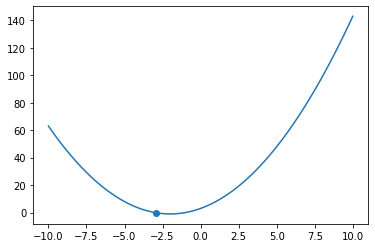

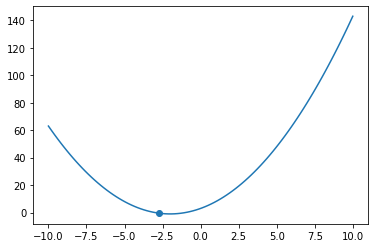

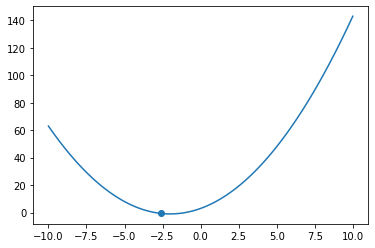

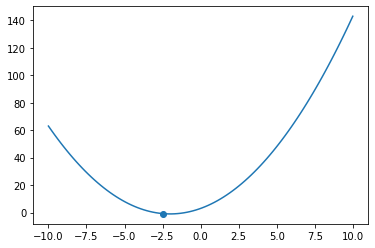

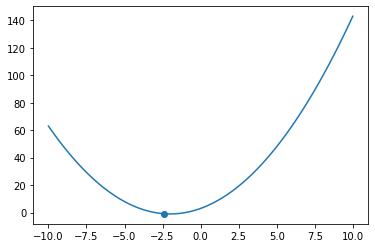

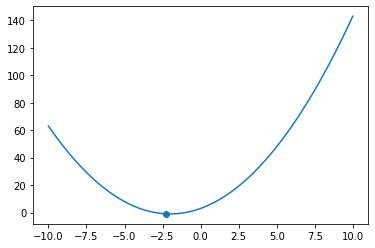

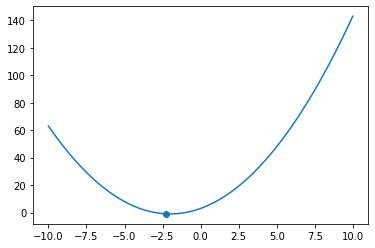

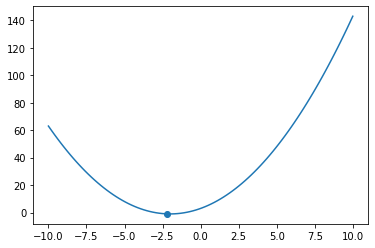

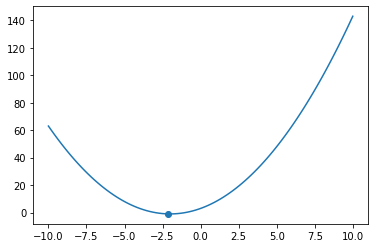

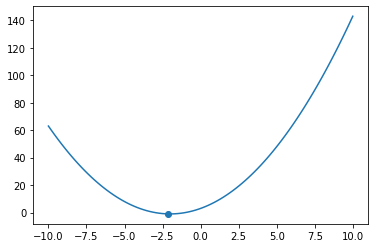

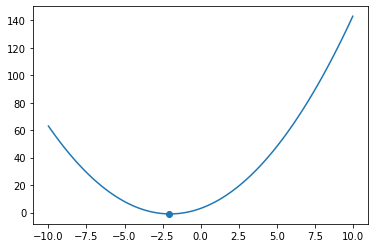

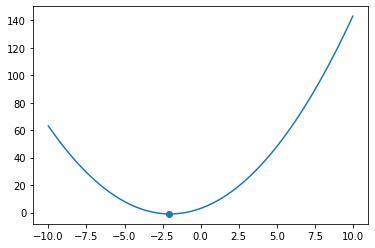

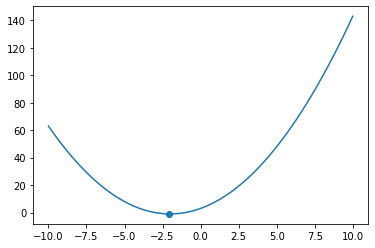

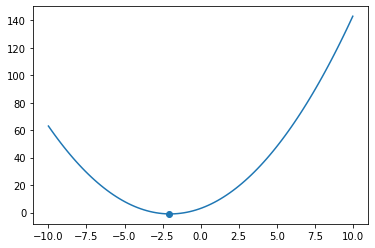

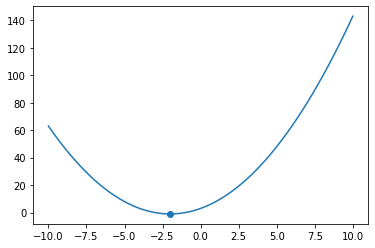

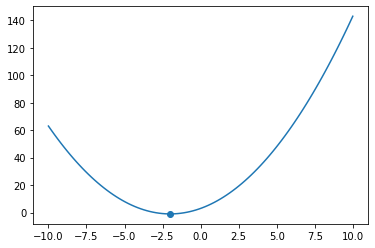

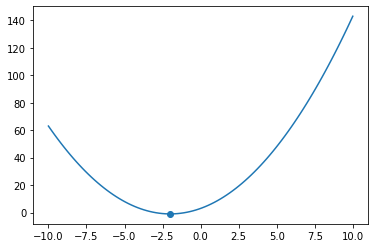

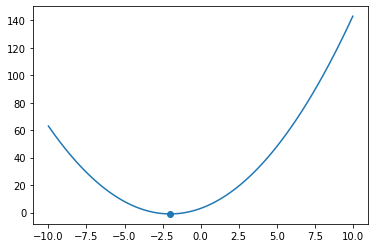

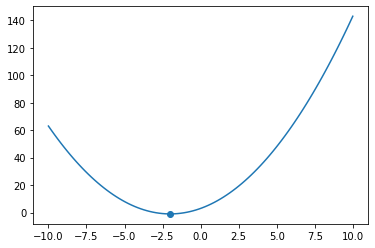

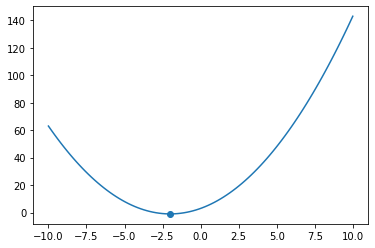

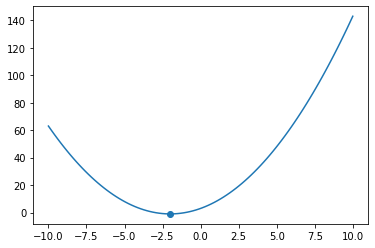

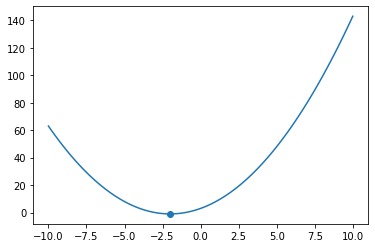

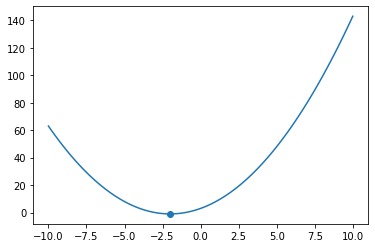

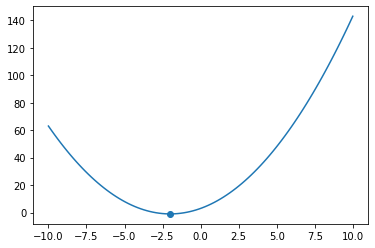

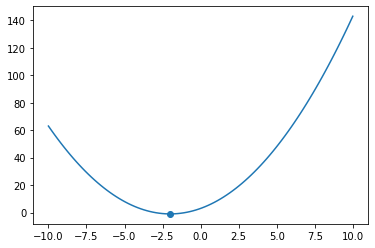

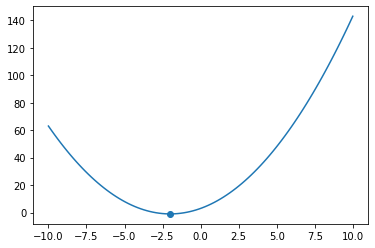

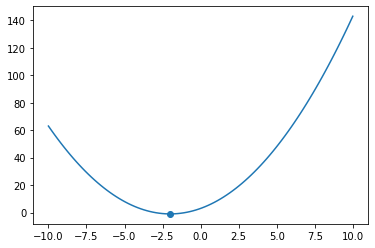

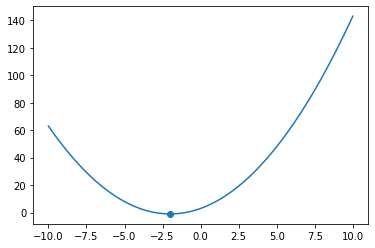

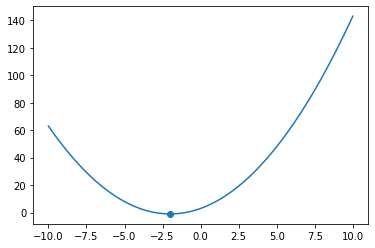

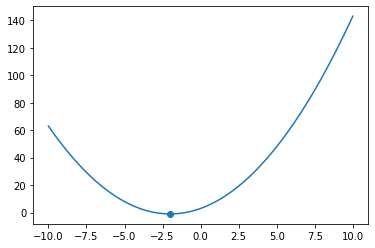

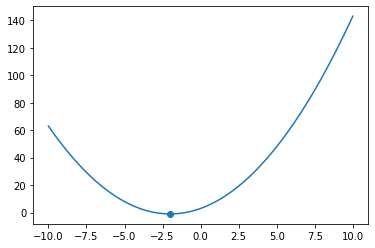

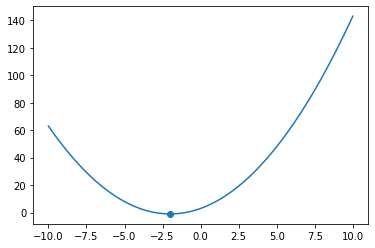

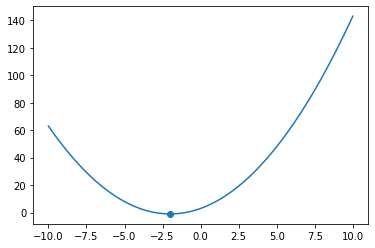

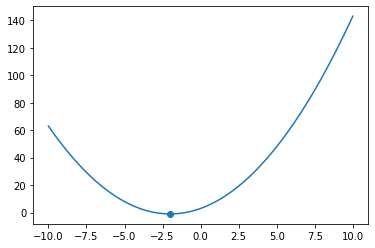

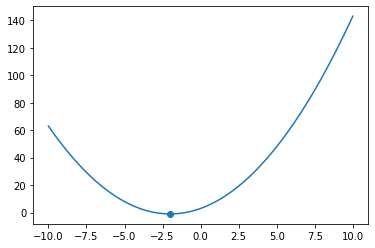

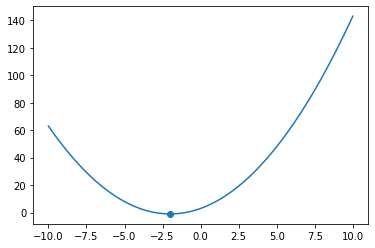

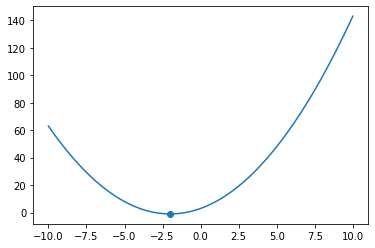

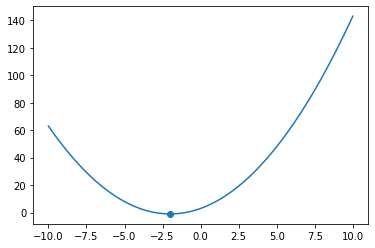

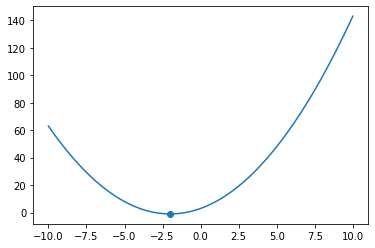

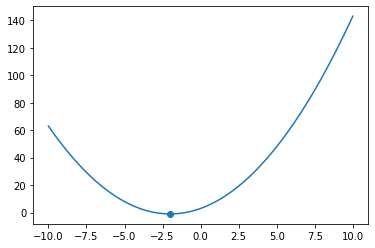

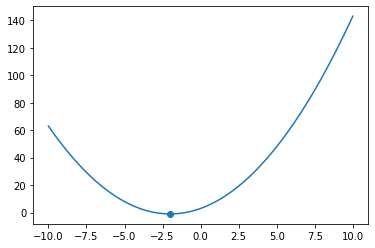

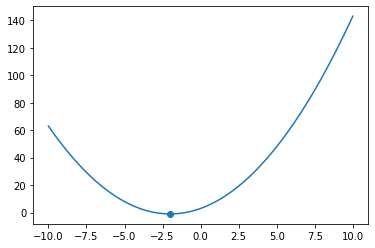

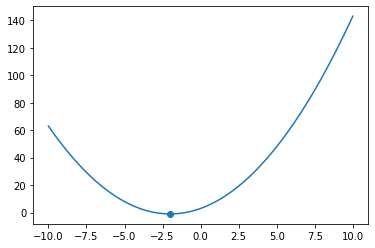

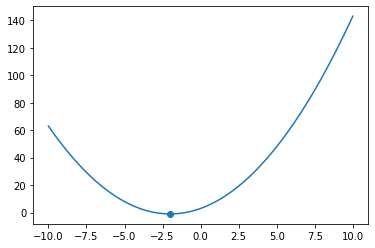

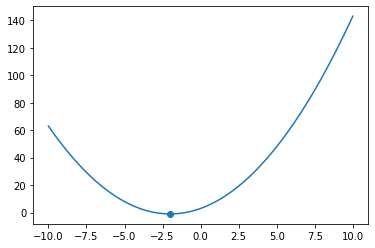

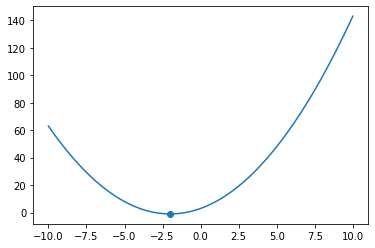

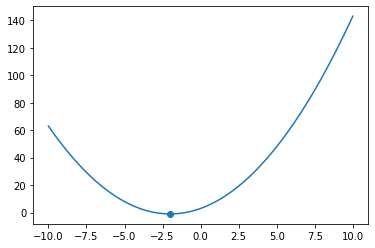

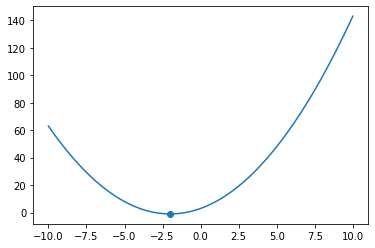

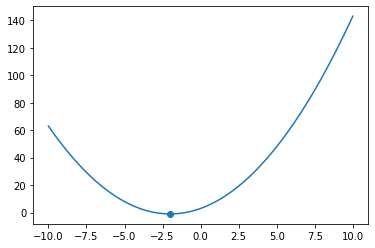

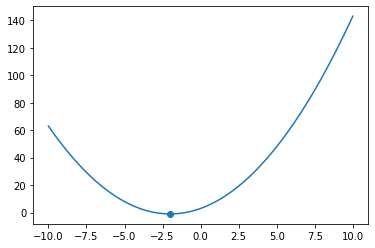

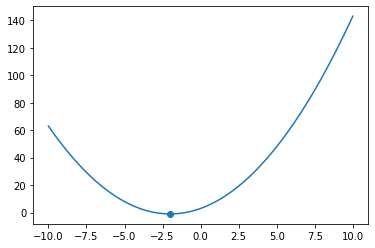

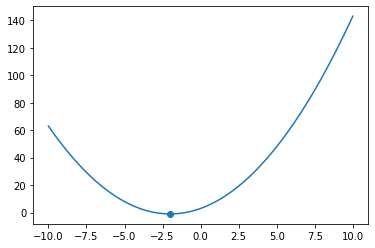

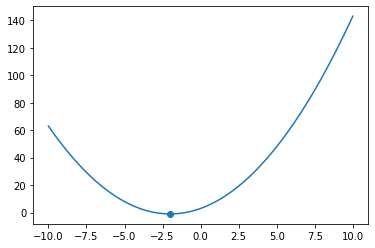

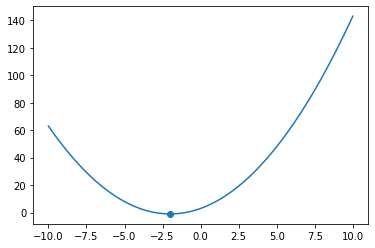

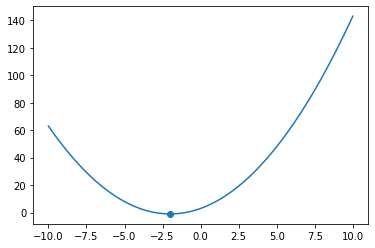

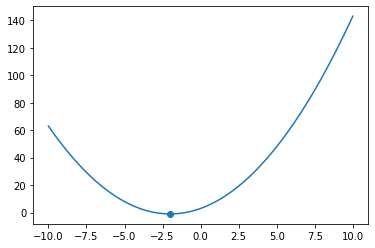

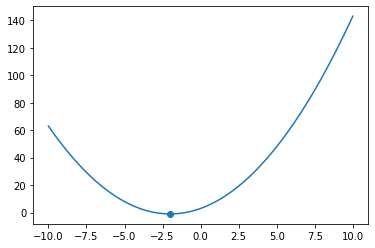

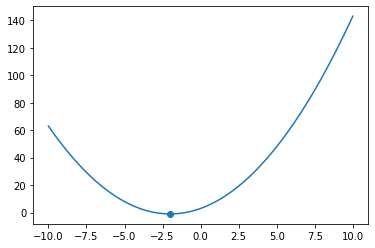

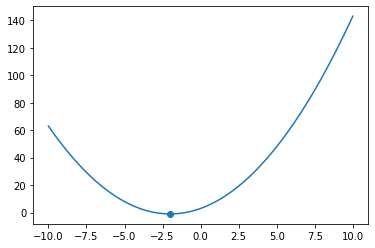

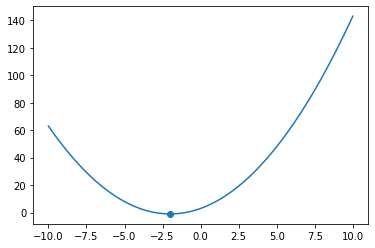

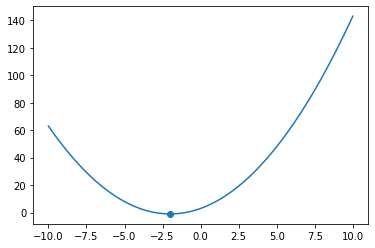

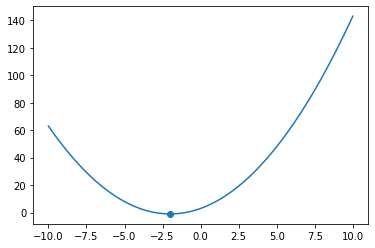

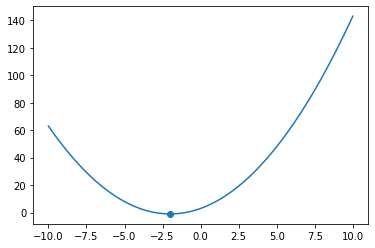

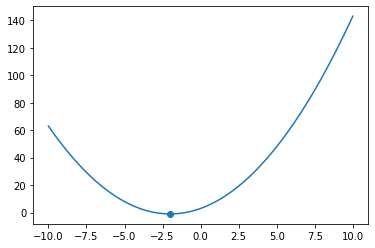

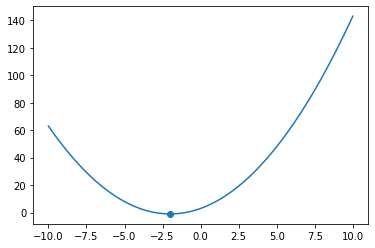

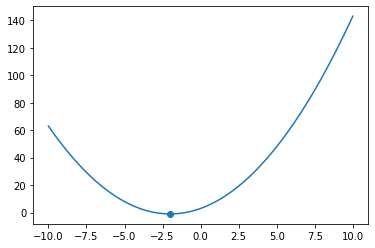

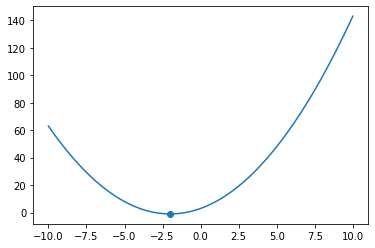

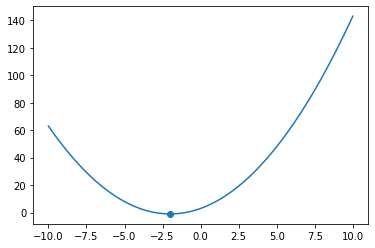

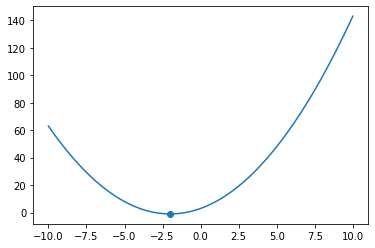

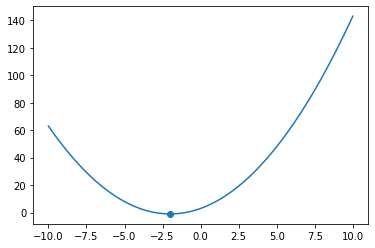

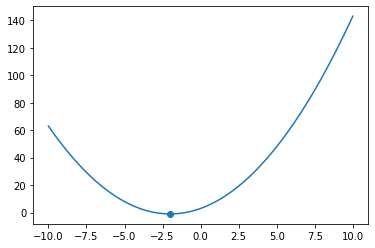

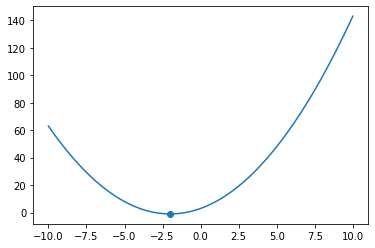

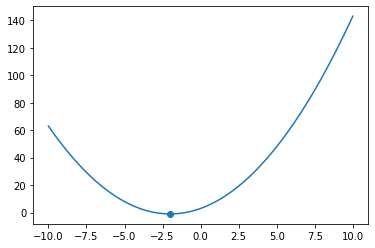

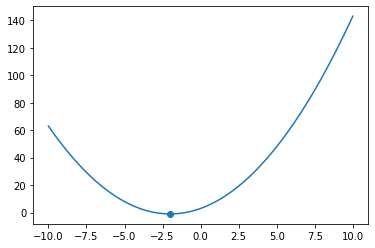

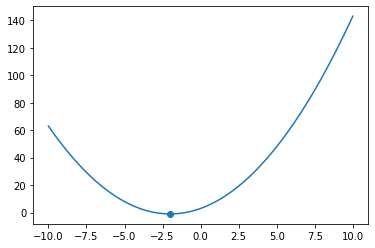

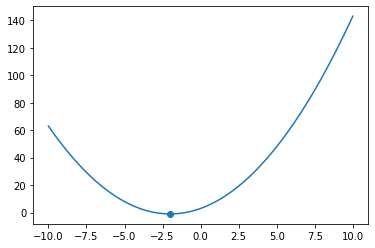

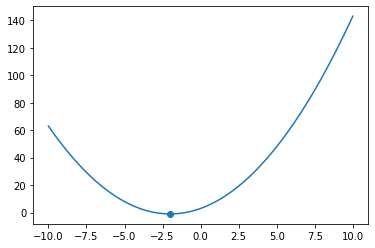

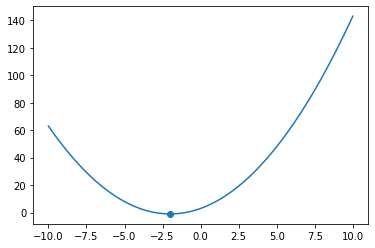

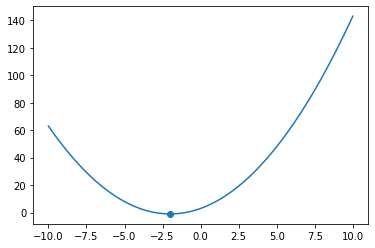

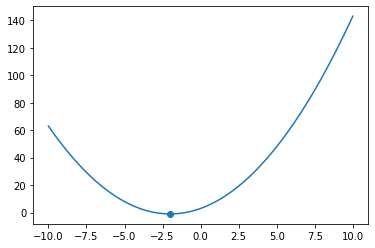

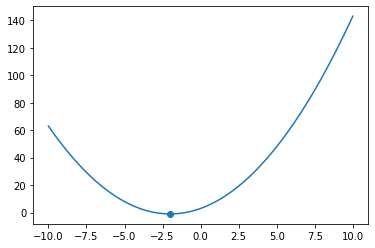

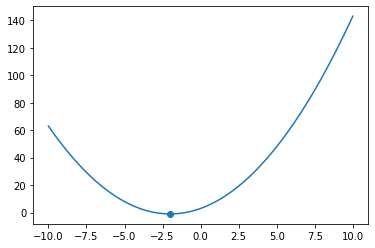

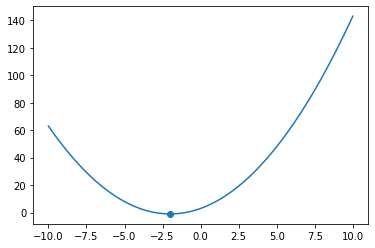

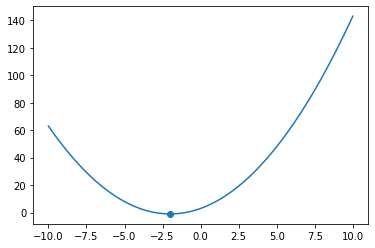

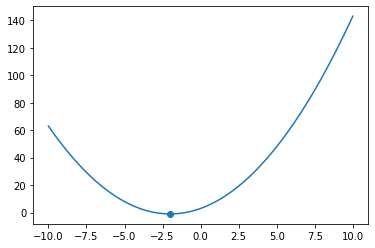

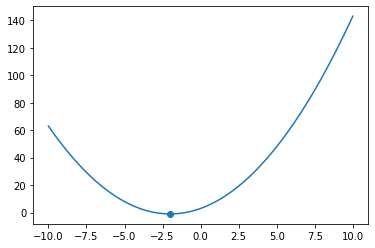

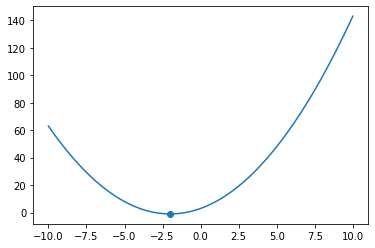

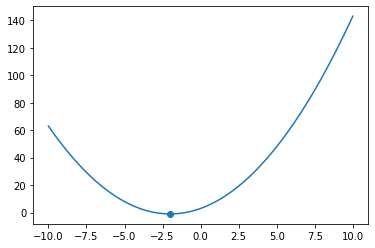

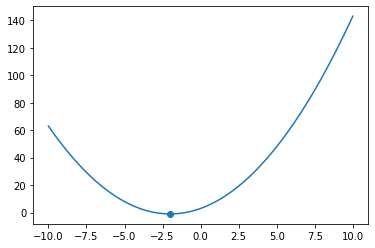

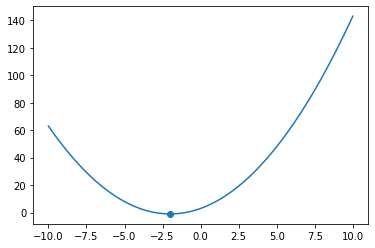

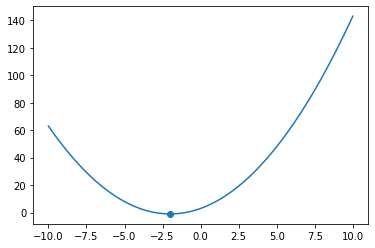

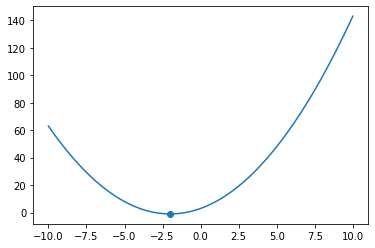

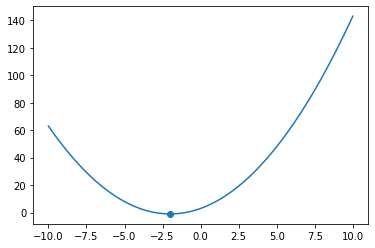

In [24]:
def gradient_descent(learning_rate, start_x, x, y):
    for i in range(100):
        start_x = start_x - learning_rate*gradients(start_x)
        ax = plt.subplot()
        ax.plot(x,y)
        plt.scatter(start_x, constan(start_x))
        plt.show()

gradient_descent(0.1, -7.5, x, y)

### Bài tập 2. Cho hàm số hai biến $f(x_1, x_2) = x_1^2 + 3x_2^2 + 1$

1. Chúng ta sẽ tìm được một điểm cực trị $x^* = (0, 0)$. Bạn hãy giải thích tại sao bằng toán học (*Gợi ý: Các bạn có thể dùng kiến thức môn Giải Tích đã học tại chương trình Đại học*).
2. Viết chương trình máy tính sử dụng thuật toán Gradient Descent tìm giá trị gần đúng của $x^*$.
3. Thay đổi nghiệm (điểm cực tiểu) ban đầu khi thực hiện thuật toán Gradient Descent và nhận xét.
4. Bạn có thể chạy thuật toán Gradient Descent bằng tay cho $2$ vòng lặp được không?

In [25]:
x1 = np.random.random((1,10))
x1

array([[0.64731126, 0.07221776, 0.79414654, 0.71705567, 0.98205063,
        0.32102424, 0.10577206, 0.44106128, 0.41811022, 0.80743288]])

In [26]:
x2 = np.random.random((1,10))
x2

array([[0.80073874, 0.99430867, 0.79844908, 0.89539866, 0.22457812,
        0.10657181, 0.92148415, 0.1609594 , 0.57324407, 0.8695503 ]])

In [27]:
y = x1**2 + 3*x2**2 + 1
y

array([[3.34255948, 3.97116459, 3.54323154, 3.91938509, 2.11572942,
        1.13712922, 3.55858687, 1.27225884, 2.16064244, 3.92030102]])

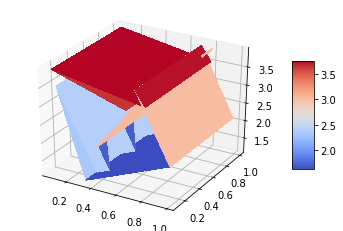

In [28]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

x1_temp = x1
x2_temp = x2
x1_temp, x2_temp = np.meshgrid(x1_temp, x2_temp)

# Plot the surface.
surf = ax.plot_surface(x1_temp, x2_temp, y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# Add a color bar which maps values to colors.

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [0]:
import autograd.numpy as anp
from autograd import grad

In [0]:
def constan(x1, x2):
    y = x1**2 + 3*x2**2 + 1
    return y
def constan1(x2, x1):
    y = x1**2 + 3*x2**2 + 1
    return y

In [31]:
grad_tanh = grad(constan)
grad_tanh1 = grad(constan1)
print(grad_tanh(3.0, 2.0))
print(grad_tanh1(2.0 , 3.0))

6.0
12.0


In [0]:
def gradient_descent2(learning_rate, start_x1, start_x2):
    for i in range(100):
        start_x1 = start_x1 - learning_rate * (grad_tanh(start_x1, start_x2)) 
        start_x2 = start_x2 - learning_rate * (grad_tanh1(start_x2, start_x1))
    print(start_x1)
    print(start_x2)

In [33]:
gradient_descent2(0.3 ,3.0 , 2.0)

4.820814132776998e-40
4.0740719526689485e-10


### Bài tập 3. Thuật toán Batch Gradient Descent
1. Cài đặt thuật toán Batch Gradient Descent cho bài toán Linear Regression trên dữ liệu `data-demo.xls` bằng cách sử dụng chương trình Python tại trang `122` và in ra màn hình kết quả của `theta`.

        eta = 0.1 # learning rate
        n_iterations = 1000
        m = 100
        theta = np.random.randn(2,1) # random initialization
        for iteration in range(n_iterations):
            gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
            theta = theta - eta * gradients

2. Bỏ hằng số $2$ trong biểu thức $(2/m)$, sau đó chạy chương trình đã đề cập ở `Bài tập 3.1.` và nhận xét.
3. Bỏ số tham số $m$ trong biểu thức $(2/m)$, sau đó chạy chương trình đã đề cập ở `Bài tập 3.1.` và nhận xét.
4. Thay đổi giá trị của `eta` (ký hiệu toán học $\eta$: độ học), giá trị khởi tạo của `theta` có sự khác biệt so với ban đầu và nhận xét kết quả đạt được.
5. Thay đổi điều kiện dừng bằng cách sử dụng điều kiện `gradient` < `epsilon`. (Gợi ý: Các bạn khởi tạo biến `epsilon` có giá trị thật nhỏ bằng dòng lệnh, ví dụ `epsilon = 1e-5` tương đương với epsilion = 0.00001).

In [0]:
import pandas as pd

In [35]:
data = pd.ExcelFile('demo_data.xls')
df = pd.read_excel(data, 0 , header = 0)
df.shape

(100, 2)

In [36]:
X = df['X']
X = X.to_numpy()
X = np.reshape(X, (100,1))
X_b = np.c_[np.ones((100,1)), X]
X_b.shape

(100, 2)

In [37]:
y = df['y']
y = y.to_numpy()
y = np.reshape(y, (100, 1))
y

array([[10.69863313],
       [ 5.23175305],
       [ 6.46378416],
       [ 6.63385516],
       [ 8.90954231],
       [ 8.3251352 ],
       [ 6.40003911],
       [ 8.0877246 ],
       [ 9.76271765],
       [ 8.12117081],
       [ 5.01869862],
       [ 4.84289361],
       [11.35865511],
       [ 4.56954212],
       [ 5.11693777],
       [ 4.70391745],
       [ 8.48744652],
       [ 8.60348556],
       [ 6.92626444],
       [ 7.1090891 ],
       [ 7.8837243 ],
       [ 6.14087247],
       [10.43320716],
       [ 9.63698557],
       [ 4.41726272],
       [ 8.20446457],
       [11.66359946],
       [ 6.22608574],
       [10.55136493],
       [ 9.03601777],
       [ 6.50757385],
       [ 7.10672276],
       [ 7.13341709],
       [ 6.56101194],
       [ 6.51745874],
       [ 5.44757381],
       [ 9.59429862],
       [ 7.90053854],
       [ 9.29331171],
       [ 5.77240831],
       [ 6.99103447],
       [ 9.19039069],
       [ 5.10584241],
       [ 2.86884344],
       [ 9.85328325],
       [ 8

In [0]:
def bgd(theta, X_b, y):
    learning_rate = 0.1 
    iteration = 1000
    m = 100
    for i in range(iteration):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - learning_rate * gradients
    return theta

In [39]:
theta = np.random.randint(100, size = (2,1))
theta

array([[70],
       [12]])

In [40]:
theta_best = bgd(theta, X_b, y)
theta_best

array([[4.1648496 ],
       [2.93275231]])

In [0]:
y_predict = X_b.dot(theta_best)

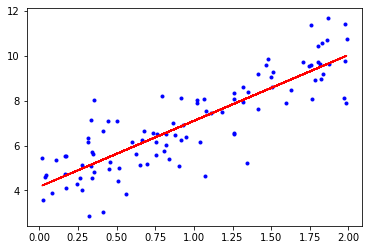

In [42]:
plt.plot(X, y, "b.")
plt.plot(X, y_predict, "r-")
plt.show()

In [0]:
def bgd1(theta, X_b, y):
    learning_rate = 0.1 
    iteration = 1000
    m = 100
    for i in range(iteration):
        gradients = 1/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - learning_rate * gradients
    return theta

In [44]:
theta = np.random.randint(100, size = (2,1))
theta

array([[2],
       [0]])

In [45]:
theta_best = bgd1(theta, X_b, y)
theta_best

array([[4.1648496 ],
       [2.93275231]])

In [0]:
y_predict = X_b.dot(theta_best)

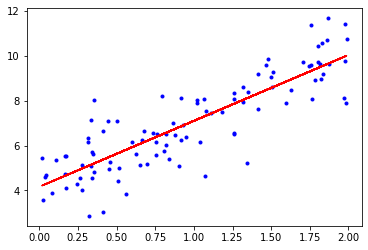

In [47]:
plt.plot(X, y, "b.")
plt.plot(X, y_predict, "r-")
plt.show()

# khi ta bỏ đi giá trị 2 trong 2/m ta thấy rằng hàm gradient descent cho ra kết quả không thay đổi nhiều so với hàm gốc, điều này thuận tiện hơn cho việc sử dụng hàm 
# gradient descent, ta có thể bỏ qua được 1 bước tính toán

In [0]:
def bgd2(theta, X_b, y):
    learning_rate = 0.1 
    iteration = 1000
    m = 100
    for i in range(iteration):
        gradients = 2 * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - learning_rate * gradients
    return theta

In [49]:
theta = np.random.randint(100, size = (2,1))
theta

array([[22],
       [26]])

In [50]:
theta_best = bgd2(theta, X_b, y)
theta_best

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in subtract
  import sys


array([[nan],
       [nan]])

# Sau khi bỏ đi giá trị m trong 2/m ta thấy rằng hàm gradient descent không thể trả về kết quả vì m là 1 thành phần quan trọng trong cost function

In [0]:
def bgd3(theta, X_b, y):
    learning_rate = 0.1 
    iteration = 1000
    m = 100
    for i in range(iteration):
        gradients = X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - learning_rate * gradients
    return theta

In [52]:
theta = np.random.randint(100, size = (2,1))
theta

array([[74],
       [57]])

In [53]:
theta_best = bgd3(theta, X_b, y)
theta_best

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in subtract
  import sys


array([[nan],
       [nan]])

# tương tự như câu trên việc bỏ đi giá trị m sẽ làm hàm gradient descent không trả ra kết quả

In [0]:
def bgd4(theta, X_b, y):
    learning_rate = 0.5 
    iteration = 1000
    m = 100
    for i in range(iteration):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - learning_rate * gradients
    return theta

In [55]:
theta = np.random.randint(100, size = (2,1))
theta

array([[60],
       [35]])

In [56]:
theta_best = bgd4(theta, X_b, y)
theta_best

array([[3.35392773e+50],
       [3.89296268e+50]])

In [0]:
def bgd5(theta, X_b, y):
    learning_rate = 0.2 
    iteration = 1000
    m = 100
    for i in range(iteration):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - learning_rate * gradients
    return theta

In [58]:
theta = np.random.randint(100, size = (2,1))
theta

array([[37],
       [ 3]])

In [59]:
theta_best = bgd4(theta, X_b, y)
theta_best

array([[1.18625684e+50],
       [1.37690910e+50]])

# khi ta thay giá trị của learning rate thì hàm gradient descent sẽ chạy theo xu hướng tăng giá trị của theta lên, vì vậy cần phải chọn giá trị gradient descent tương đối nhỏ khi thực hiện tính toán


In [0]:
def bgd5(theta, X_b, y):
    learning_rate = 0.1 
    iteration = 1000
    m = 100
    epsilon = 0.00001
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    while gradients < epsilon:
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - learning_rate * gradients
    return theta

In [61]:
theta = np.random.randint(100, size = (2,1))
theta

array([[79],
       [90]])

In [62]:
theta_best = bgd5(theta, X_b, y)
theta_best

ValueError: ignored

### Bài tập 4. Thuật toán Stochastic Gradient Descent
1. Cài đặt thuật toán Stochastic Gradient Descent cho bài toán Linear Regression trên dữ liệu `data-demo.xls` bằng cách sử dụng chương trình Python tại trang `125` và in ra màn hình kết quả của `theta`.

        n_epochs = 50
        t0, t1 = 5, 50 # learning schedule hyperparameters
        def learning_schedule(t):
            return t0 / (t + t1)
        theta = np.random.randn(2,1) # random initialization
        for epoch in range(n_epochs):
            for i in range(m):
                random_index = np.random.randint(m)
                xi = X_b[random_index:random_index+1]
                yi = y[random_index:random_index+1]
                gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
                eta = learning_schedule(epoch * m + i)
                theta = theta - eta * gradients

2. So sánh nhanh hai chương trình Python đã đề cập ở `Bài tập 3.1.` và `Bài tập 4.1.`.
3. Vai trò của hàm `learning_schedule` trong chương trình Python đã đề cập ở `Bài tập 4.1.`. Nếu không sử dụng hàm này thì kết quả của bài tập sẽ như thế nào.
4. Sử dùng lớp [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) để cài đặt thuật toán Stochastic Gradient Descent thay cho chương trình Python đã đề cập ở `Bài tập 4.1.`.

### Bài tập 5. Thuật toán Mini-Batch Gradient Descent
1. Cài đặt thuật toán `Mini-Batch Gradient Descent` cho bài toán `Linear Regression` trên dữ liệu `data-demo.xls` bằng cách `chỉnh sửa` chương trình Python tại trang `125` và in ra màn hình kết quả của `theta`.

        n_epochs = 50
        t0, t1 = 5, 50 # learning schedule hyperparameters
        def learning_schedule(t):
            return t0 / (t + t1)
        theta = np.random.randn(2,1) # random initialization
        for epoch in range(n_epochs):
            for i in range(m):
                random_index = np.random.randint(m)
                xi = X_b[random_index:random_index+1]
                yi = y[random_index:random_index+1]
                gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
                eta = learning_schedule(epoch * m + i)
                theta = theta - eta * gradients

2. Sử dùng lớp [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) để cài đặt thuật toán Stochastic Gradient Descent thay cho chương trình Python đã đề cập ở `Bài tập 5.1.`. *Gợi ý*: Khác với yêu cầu trong `Bài tập 4.4.`, các bạn sẽ chia bộ dữ liệu huấn luyện ban đầu thành các bộ dữ liệu nhỏ có kích cỡ gọi là `Mini-Batch Size`, ví dụ các bạn có thể sử dụng $4$ chẳng hạn. Cuối cùng, thay vì các bạn sử dụng phương thức [`fit`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor.fit) của [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) thì các bạn sẽ sử dụng phương thức [`partial_fit`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor.partial_fit) cho các bộ dữ liệu nhỏ thành phần.